In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

In [2]:
dirDataframes = 'data/training/dataframes/'
dfFiles = []
# r=root, d=directories, f = files
for r, d, f in os.walk(dirDataframes):
    for file in f:
        if '.csv' in file:
            dfFiles.append(os.path.join(r, file))
print("Found {0} dataframe files which is {1} patient sets (nodes 0-4).".format(len(dfFiles), len(dfFiles)//5))

Found 500 dataframe files which is 100 patient sets (nodes 0-4).


Group dataframes by center.

In [3]:
center_0_files = []
center_1_files = []
center_2_files = []
center_3_files = []
center_4_files = []
for f in dfFiles:
    patient = int(f.split('_')[1])
    if patient < 20: 
        center_0_files.append(f)
    elif patient < 40:
        center_1_files.append(f)
    elif patient < 60: 
        center_2_files.append(f)
    elif patient < 80:
        center_3_files.append(f)
    else:
        center_4_files.append(f)
print('Center 0: {0} dataframes\nCenter 1: {1} dataframes\nCenter 2: {2} dataframes\nCenter 3: {3} dataframes\nCenter 4: {4} dataframes\n'.format(
    len(center_0_files),
len(center_1_files),
len(center_2_files),
len(center_3_files),
len(center_4_files)))

Center 0: 100 dataframes
Center 1: 100 dataframes
Center 2: 100 dataframes
Center 3: 100 dataframes
Center 4: 100 dataframes



## Combine dataframes for each center
Also, tumorPercentage has been miscalculated by dividing the value with a wrong number of image channels (3 instead of 1). This can be corrected by multiplying tumorPercentage column by three.

In [4]:
df_center_0 = pd.read_csv(center_0_files[0]).set_index('Unnamed: 0')
for i in tqdm_notebook(range(1,len(center_0_files)), "merge dfs"):
    df_center_0 = df_center_0.append(pd.read_csv(center_0_files[i]).set_index('Unnamed: 0'), ignore_index=True)
df_center_0['tumorPercentage'] = df_center_0['tumorPercentage']*3
print("Center 0 has {0} patches".format(len(df_center_0)))


Center 0 has 4157654 patches


In [5]:
df_center_1 = pd.read_csv(center_1_files[0]).set_index('Unnamed: 0')
for i in tqdm_notebook(range(1,len(center_1_files)), "merge dfs"):
    df_center_1 = df_center_1.append(pd.read_csv(center_1_files[i]).set_index('Unnamed: 0'), ignore_index=True)
df_center_1['tumorPercentage'] = df_center_1['tumorPercentage']*3
print("Center 1 has {0} patches".format(len(df_center_1)))


Center 1 has 7173904 patches


In [6]:
df_center_2 = pd.read_csv(center_2_files[0]).set_index('Unnamed: 0')
for i in tqdm_notebook(range(1,len(center_2_files)), "merge dfs"):
    df_center_2 = df_center_2.append(pd.read_csv(center_2_files[i]).set_index('Unnamed: 0'), ignore_index=True)
df_center_2['tumorPercentage'] = df_center_2['tumorPercentage']*3
print("Center 2 has {0} patches".format(len(df_center_2)))


Center 2 has 6759188 patches


In [7]:
df_center_3 = pd.read_csv(center_3_files[0]).set_index('Unnamed: 0')
for i in tqdm_notebook(range(1,len(center_3_files)), "merge dfs"):
    df_center_3 = df_center_3.append(pd.read_csv(center_3_files[i]).set_index('Unnamed: 0'), ignore_index=True)
df_center_3['tumorPercentage'] = df_center_3['tumorPercentage']*3
print("Center 3 has {0} patches".format(len(df_center_3)))


Center 3 has 6558462 patches


In [8]:
df_center_4 = pd.read_csv(center_4_files[0]).set_index('Unnamed: 0')
for i in tqdm_notebook(range(1,len(center_4_files)), "merge dfs"):
    df_center_4 = df_center_4.append(pd.read_csv(center_4_files[i]).set_index('Unnamed: 0'), ignore_index=True)
df_center_4['tumorPercentage'] = df_center_4['tumorPercentage']*3
print("Center 4 has {0} patches".format(len(df_center_4)))


Center 4 has 2143729 patches


## Quick center stats

In [9]:
print("CENTER 0")
df_center_0.describe(include='all')

CENTER 0


,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue
count,4.157654e+06,4157654,4157654.0,4.157654e+06,4.157654e+06,4.157654e+06,4.157654e+06,4157654,4.157654e+06,4.157654e+06,4.157654e+06,4.157654e+06,4.157654e+06
unique,NaN,100,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,data/training/center_0/patient_019_node_0.tif,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,110144,NaN,NaN,NaN,NaN,NaN,4141727,NaN,NaN,NaN,NaN,NaN
mean,1.025302e+16,NaN,0.0,1.025205e+01,1.951975e+00,9.743115e+04,4.438109e+04,NaN,3.297351e-01,8.903922e+01,7.772310e-01,1.376225e-01,7.722218e-01
std,5.794023e+15,NaN,0.0,5.794028e+00,1.414811e+00,3.469126e+04,1.849690e+04,NaN,5.618892e+00,2.242456e+01,4.325062e-02,8.179133e-02,1.363661e-01
min,3.072004e+10,NaN,0.0,0.000000e+00,0.000000e+00,2.048000e+03,1.024000e+03,NaN,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.001179e+15,NaN,0.0,5.000000e+00,1.000000e+00,7.206400e+04,2.956800e+04,NaN,0.000000e+00,9.530000e+01,7.400000e-01,6.000000e-02,6.600000e-01
50%,1.100063e+16,NaN,0.0,1.100000e+01,2.000000e+00,9.766400e+04,4.441600e+04,NaN,0.000000e+00,1.000000e+02,7.800000e-01,1.400000e-01,7.700000e-01
75%,1.500145e+16,NaN,0.0,1.500000e+01,3.000000e+00,1.222400e+05,5.900800e+04,NaN,0.000000e+00,1.000000e+02,8.100000e-01,1.900000e-01,9.000000e-01


In [10]:
print("CENTER 1")
df_center_1.describe(include='all')

CENTER 1


,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue
count,7.173904e+06,7173904,7173904.0,7.173904e+06,7.173904e+06,7.173904e+06,7.173904e+06,7173904,7.173904e+06,7.173904e+06,7.173904e+06,7.173904e+06,7.173904e+06
unique,NaN,100,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,data/training/center_1/patient_034_node_1.tif,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,190001,NaN,NaN,NaN,NaN,NaN,7163856,NaN,NaN,NaN,NaN,NaN
mean,2.965141e+16,NaN,1.0,2.965024e+01,1.979241e+00,1.175260e+05,4.503841e+04,NaN,9.901483e-02,8.961786e+01,8.121380e-01,2.128637e-01,6.377384e-01
std,5.864974e+15,NaN,0.0,5.864983e+00,1.375326e+00,4.470326e+04,1.855030e+04,NaN,2.970135e+00,2.214843e+01,4.392999e-02,1.302291e-01,1.738789e-01
min,2.000003e+16,NaN,1.0,2.000000e+01,0.000000e+00,2.432000e+03,1.024000e+03,NaN,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.400166e+16,NaN,1.0,2.400000e+01,1.000000e+00,8.243200e+04,3.161600e+04,NaN,0.000000e+00,9.880000e+01,7.800000e-01,9.000000e-02,5.300000e-01
50%,3.000067e+16,NaN,1.0,3.000000e+01,2.000000e+00,1.218560e+05,4.492800e+04,NaN,0.000000e+00,1.000000e+02,8.100000e-01,2.300000e-01,6.100000e-01
75%,3.500148e+16,NaN,1.0,3.500000e+01,3.000000e+00,1.557760e+05,5.875200e+04,NaN,0.000000e+00,1.000000e+02,8.400000e-01,3.100000e-01,7.800000e-01


In [11]:
print("CENTER 2")
df_center_2.describe(include='all')

CENTER 2


,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue
count,6.759188e+06,6759188,6759188.0,6.759188e+06,6.759188e+06,6.759188e+06,6.759188e+06,6759188,6.759188e+06,6.759188e+06,6.759188e+06,6.759188e+06,6.759188e+06
unique,NaN,100,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,data/training/center_2/patient_042_node_4.tif,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,171506,NaN,NaN,NaN,NaN,NaN,6736491,NaN,NaN,NaN,NaN,NaN
mean,4.936397e+16,NaN,2.0,4.936349e+01,2.062314e+00,4.787813e+04,5.710325e+04,NaN,2.900922e-01,8.349478e+01,8.601538e-01,2.950248e-01,7.721301e-01
std,5.723981e+15,NaN,0.0,5.723981e+00,1.443635e+00,2.275771e+04,2.900343e+04,NaN,5.273906e+00,2.619364e+01,5.195772e-02,1.969997e-01,1.040035e-01
min,4.000001e+16,NaN,2.0,4.000000e+01,0.000000e+00,8.960000e+02,1.024000e+03,NaN,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,3.000000e-02
25%,4.500018e+16,NaN,2.0,4.500000e+01,1.000000e+00,2.931200e+04,3.404800e+04,NaN,0.000000e+00,7.100000e+01,8.200000e-01,1.000000e-01,6.800000e-01
50%,4.900067e+16,NaN,2.0,4.900000e+01,2.000000e+00,4.748800e+04,5.401600e+04,NaN,0.000000e+00,1.000000e+02,8.600000e-01,2.700000e-01,8.100000e-01
75%,5.500019e+16,NaN,2.0,5.500000e+01,3.000000e+00,6.553600e+04,7.705600e+04,NaN,0.000000e+00,1.000000e+02,9.000000e-01,4.800000e-01,8.700000e-01


In [12]:
print("CENTER 3")
df_center_3.describe(include='all')

CENTER 3


,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue
count,6.558462e+06,6558462,6558462.0,6.558462e+06,6.558462e+06,6.558462e+06,6.558462e+06,6558462,6.558462e+06,6.558462e+06,6.558462e+06,6.558462e+06,6.558462e+06
unique,NaN,100,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,data/training/center_3/patient_064_node_3.tif,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,194420,NaN,NaN,NaN,NaN,NaN,6524963,NaN,NaN,NaN,NaN,NaN
mean,6.915845e+16,NaN,3.0,6.915716e+01,1.986181e+00,1.282254e+05,4.714123e+04,NaN,4.683556e-01,8.928341e+01,7.777652e-01,2.206055e-01,7.006585e-01
std,5.669774e+15,NaN,0.0,5.669760e+00,1.360159e+00,3.368326e+04,1.994060e+04,NaN,6.739984e+00,2.230385e+01,4.534718e-02,1.259634e-01,1.918941e-01
min,6.000003e+16,NaN,3.0,6.000000e+01,0.000000e+00,2.048000e+03,1.024000e+03,NaN,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.400173e+16,NaN,3.0,6.400000e+01,1.000000e+00,1.032960e+05,3.161600e+04,NaN,0.000000e+00,9.680000e+01,7.400000e-01,1.000000e-01,5.300000e-01
50%,6.900109e+16,NaN,3.0,6.900000e+01,2.000000e+00,1.315840e+05,4.633600e+04,NaN,0.000000e+00,1.000000e+02,7.800000e-01,2.300000e-01,6.900000e-01
75%,7.400109e+16,NaN,3.0,7.400000e+01,3.000000e+00,1.537280e+05,6.297600e+04,NaN,0.000000e+00,1.000000e+02,8.100000e-01,3.200000e-01,9.000000e-01


In [13]:
print("CENTER 4")
df_center_4.describe(include='all')

CENTER 4


,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue
count,2.143729e+06,2143729,2143729.0,2143729.0,2143729.0,2143729.0,2143729.0,2143729,2.143729e+06,2.143729e+06,2.143729e+06,2.143729e+06,2.143729e+06
unique,1.826172e+06,29,1.0,16.0,5.0,768.0,1203.0,2,NaN,NaN,NaN,NaN,NaN
top,8.400055e+16,data/training/center_4/patient_089_node_2.tif,4.0,84.0,1.0,42240.0,23808.0,False,NaN,NaN,NaN,NaN,NaN
freq,3.000000e+00,165271,2143729.0,319148.0,653731.0,4744.0,3642.0,2138133,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.271515e-01,9.178767e+01,8.556421e-01,2.100311e-01,8.031256e-01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.658536e+00,2.006611e+01,3.993791e-02,8.948487e-02,5.781560e-02
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.000000e-01,0.000000e+00,1.000000e-02,3.100000e-01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+02,8.300000e-01,1.500000e-01,7.600000e-01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+02,8.700000e-01,2.100000e-01,8.000000e-01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+02,8.900000e-01,2.700000e-01,8.600000e-01


- Tumor patches are really rare. ~0.03 % of patches in center 4.
- Mean hue saturation and value stats vary between centers. How much?
- Mean tissue percentages are around 90 % which is good. Median tissue percentages are 100 %.

Pick randomly 50 WSI's and plot some color distributions

In [14]:
from random import shuffle
shuffle(dfFiles)
sub_df_list = dfFiles[:50]

In [15]:
df_sample = pd.read_csv(sub_df_list[0]).set_index('Unnamed: 0')
for i in tqdm_notebook(range(1,len(sub_df_list)), "merge dfs"):
    df_sample = df_sample.append(pd.read_csv(sub_df_list[i]).set_index('Unnamed: 0'), ignore_index=True)
df_sample['tumorPercentage'] = df_sample['tumorPercentage']*3
print("Sub list has {0} patches".format(len(df_sample)))


Sub list has 2683499 patches


In [16]:
print("RANDOM SAMPLE")
df_sample.describe(include='all')

RANDOM SAMPLE


,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue
count,2.683499e+06,2683499,2683499.0,2683499.0,2683499.0,2683499.0,2683499.0,2683499,2.683499e+06,2.683499e+06,2.683499e+06,2.683499e+06,2.683499e+06
unique,2.554366e+06,44,5.0,34.0,5.0,1613.0,1041.0,2,NaN,NaN,NaN,NaN,NaN
top,1.400090e+16,data/training/center_1/patient_036_node_1.tif,1.0,14.0,4.0,77952.0,43904.0,False,NaN,NaN,NaN,NaN,NaN
freq,3.000000e+00,170401,1018355.0,185972.0,767211.0,3335.0,6238.0,2673111,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.159531e-01,8.944700e+01,8.130543e-01,2.247176e-01,7.069662e-01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.439718e+00,2.219248e+01,5.937812e-02,1.523237e-01,1.638816e-01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,9.760000e+01,7.700000e-01,1.000000e-01,6.000000e-01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+02,8.100000e-01,2.000000e-01,7.000000e-01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+02,8.500000e-01,3.200000e-01,8.500000e-01


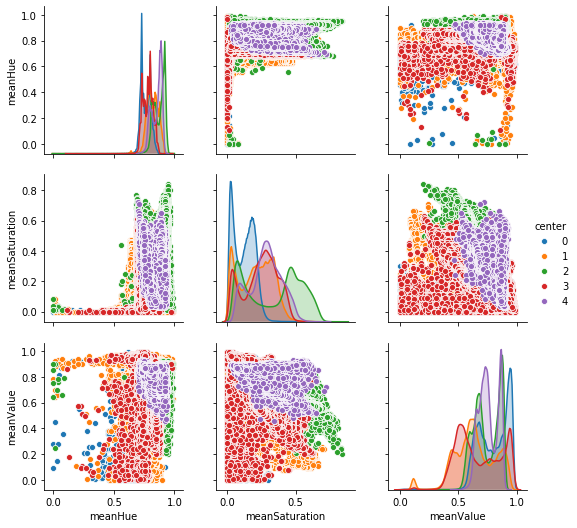

In [17]:
sns.pairplot(data=df_sample, hue='center', vars=['meanHue', 'meanSaturation', 'meanValue'])

- Tissue patches fall in the hue range of 0.6-0.9
- There is some variance in color distributions between the centers.
- Centers 1 and 3 have noticeably wider 'value' ranges than the other centers.
- Centers 0 and 3 have lower hue distributions than the others.

In [38]:
normal_count, tumor_count = df_center_0.isTumor.value_counts()
print('Center 0 has {0} tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

normal_count, tumor_count = df_center_1.isTumor.value_counts()
print('Center 1 has {0} tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

normal_count, tumor_count = df_center_2.isTumor.value_counts()
print('Center 2 has {0} tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

normal_count, tumor_count = df_center_3.isTumor.value_counts()
print('Center 3 has {0} tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

normal_count, tumor_count = df_center_4.isTumor.value_counts()
print('Center 4 has {0} tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

Center 0 has 15927 tumors and 4141727 normals (total = 4157654)
Tumor percentage 0.38307661003056054 %
Center 1 has 10048 tumors and 7163856 normals (total = 7173904)
Tumor percentage 0.14006320686755774 %
Center 2 has 22697 tumors and 6736491 normals (total = 6759188)
Tumor percentage 0.33579477298160665 %
Center 3 has 33499 tumors and 6524963 normals (total = 6558462)
Tumor percentage 0.5107752396827183 %
Center 4 has 5596 tumors and 2138133 normals (total = 2143729)
Tumor percentage 0.2610404580056528 %


Lee & Paeng 2018, achieved SOTA in Camelyon17 and they annotated 256x156 patch as tumor if it had 75% or more tumor pixels. This approach will use similar labeling so lets add new boolean dataframe column called `tumorLabel`.

In [32]:
cutOffTumorPercentage = 75
df_center_0['tumorLabel'] = df_center_0['tumorPercentage'] >= cutOffTumorPercentage
df_center_1['tumorLabel'] = df_center_1['tumorPercentage'] >= cutOffTumorPercentage
df_center_2['tumorLabel'] = df_center_2['tumorPercentage'] >= cutOffTumorPercentage
df_center_3['tumorLabel'] = df_center_3['tumorPercentage'] >= cutOffTumorPercentage
df_center_4['tumorLabel'] = df_center_4['tumorPercentage'] >= cutOffTumorPercentage

In [36]:
df_center_0.describe(include='all')

,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue,tumorLabel
count,4.157654e+06,4157654,4157654.0,4.157654e+06,4.157654e+06,4.157654e+06,4.157654e+06,4157654,4.157654e+06,4.157654e+06,4.157654e+06,4.157654e+06,4.157654e+06,4157654
unique,NaN,100,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,data/training/center_0/patient_019_node_0.tif,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,110144,NaN,NaN,NaN,NaN,NaN,4141727,NaN,NaN,NaN,NaN,NaN,4144680
mean,1.025302e+16,NaN,0.0,1.025205e+01,1.951975e+00,9.743115e+04,4.438109e+04,NaN,3.297351e-01,8.903922e+01,7.772310e-01,1.376225e-01,7.722218e-01,NaN
std,5.794023e+15,NaN,0.0,5.794028e+00,1.414811e+00,3.469126e+04,1.849690e+04,NaN,5.618892e+00,2.242456e+01,4.325062e-02,8.179133e-02,1.363661e-01,NaN
min,3.072004e+10,NaN,0.0,0.000000e+00,0.000000e+00,2.048000e+03,1.024000e+03,NaN,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.001179e+15,NaN,0.0,5.000000e+00,1.000000e+00,7.206400e+04,2.956800e+04,NaN,0.000000e+00,9.530000e+01,7.400000e-01,6.000000e-02,6.600000e-01,NaN
50%,1.100063e+16,NaN,0.0,1.100000e+01,2.000000e+00,9.766400e+04,4.441600e+04,NaN,0.000000e+00,1.000000e+02,7.800000e-01,1.400000e-01,7.700000e-01,NaN
75%,1.500145e+16,NaN,0.0,1.500000e+01,3.000000e+00,1.222400e+05,5.900800e+04,NaN,0.000000e+00,1.000000e+02,8.100000e-01,1.900000e-01,9.000000e-01,NaN


In [37]:
#Lets see how much the tumor label counts now
normal_count, tumor_count = df_center_0.tumorLabel.value_counts()
print('Center 0 has {0} labeled as tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

normal_count, tumor_count = df_center_1.tumorLabel.value_counts()
print('Center 1 has {0} labeled as tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

normal_count, tumor_count = df_center_2.tumorLabel.value_counts()
print('Center 2 has {0} labeled as tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

normal_count, tumor_count = df_center_3.tumorLabel.value_counts()
print('Center 3 has {0} labeled as tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

normal_count, tumor_count = df_center_4.tumorLabel.value_counts()
print('Center 4 has {0} labeled as tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

Center 0 has 12974 labeled as tumors and 4144680 normals (total = 4157654)
Tumor percentage 0.3120509787490734 %
Center 1 has 6042 labeled as tumors and 7167862 normals (total = 7173904)
Tumor percentage 0.08422192435248646 %
Center 2 has 18620 labeled as tumors and 6740568 normals (total = 6759188)
Tumor percentage 0.27547687680827937 %
Center 3 has 29719 labeled as tumors and 6528743 normals (total = 6558462)
Tumor percentage 0.4531397757584019 %
Center 4 has 4593 labeled as tumors and 2139136 normals (total = 2143729)
Tumor percentage 0.21425282766618356 %


In [39]:
# Save center df's
df_center_0.to_csv('data/training/center_0.csv')
df_center_1.to_csv('data/training/center_1.csv')
df_center_2.to_csv('data/training/center_2.csv')
df_center_3.to_csv('data/training/center_3.csv')
df_center_4.to_csv('data/training/center_4.csv')